In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [3]:
def sigma(v):
    return 5e-20*np.sqrt(2*1.602e-19/m)/v
def vm(v):
    return n0*v*sigma(v)
def dvm(v):
    return 0#n0*sigma(v)

In [59]:
def a(v):
    return q**2*E**2/(3*vm(v)*m**2) + k*T0*vm(v)/m0
def b(v):
    return vm(v)*v*m/m0

In [60]:
def F(f,v):
    return -b(v)*f/a(v)

In [64]:
n=500

vmin=1e4
vmax=2*np.sqrt(24*1.602e-19/m)
v=np.logspace(np.log10(vmin),np.log10(vmax),n)
v=np.reshape(v,(n,1))

dv=v[1:]-v[:n-1]#v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)

f=np.ones(n)
for i in range(0,n-1):
    k1=dv[i]*F(f[i],v[i])
    k2=dv[i]*F(f[i]+0.5*k1,v[i]+0.5*dv[i])
    k3=dv[i]*F(f[i]+0.5*k2,v[i]+0.5*dv[i])
    k4=dv[i]*F(f[i]+k3,v[i]+dv[i])
    f[i+1]=f[i]+(k1+2*k2+2*k3+k4)/6
    if f[i+1]<100*np.finfo(float).eps:
        n=i
        print('Machine Epsilon reached')
        break
    if i<5:
        print(k1,k2,k3,k4,f[i])
'''for i in range(n-1,0,-1):
    k1=dv[i-1]*F(f[i],v[i])
    k2=dv[i-1]*F(f[i]+0.5*k1,v[i]+0.5*dv[i-1])
    k3=dv[i-1]*F(f[i]+0.5*k2,v[i]+0.5*dv[i-1])
    k4=dv[i-1]*F(f[i]+k3,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
    f[i-1]=f[i]+(k1+2*k2+2*k3+k4)/6
    norm=np.max(np.abs(f))
    f=f/norm
    if i>n-5: print(k1,k2,k3,k4)
'''

[ -1.41954742e-05] [ -1.42814947e-05] [ -1.42814941e-05] [ -1.43675128e-05] 1.0
[ -1.45418441e-05] [ -1.46299610e-05] [ -1.46299603e-05] [ -1.47180753e-05] 0.999985718506
[ -1.48966602e-05] [ -1.49869245e-05] [ -1.49869238e-05] [ -1.50771861e-05] 0.999971088546
[ -1.52601283e-05] [ -1.53525922e-05] [ -1.53525915e-05] [ -1.54450532e-05] 0.999956101622
[ -1.56324591e-05] [ -1.57271760e-05] [ -1.57271753e-05] [ -1.58218900e-05] 0.99994074903
Machine Epsilon reached


'for i in range(n-1,0,-1):\n    k1=dv[i-1]*F(f[i],v[i])\n    k2=dv[i-1]*F(f[i]+0.5*k1,v[i]+0.5*dv[i-1])\n    k3=dv[i-1]*F(f[i]+0.5*k2,v[i]+0.5*dv[i-1])\n    k4=dv[i-1]*F(f[i]+k3,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);\n    f[i-1]=f[i]+(k1+2*k2+2*k3+k4)/6\n    norm=np.max(np.abs(f))\n    f=f/norm\n    if i>n-5: print(k1,k2,k3,k4)\n'

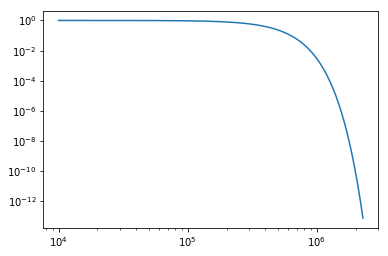

(450, 1)


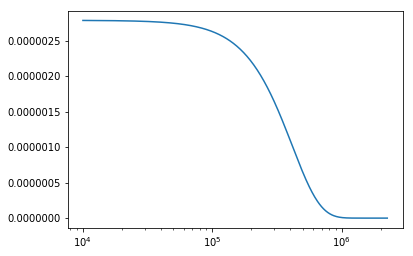

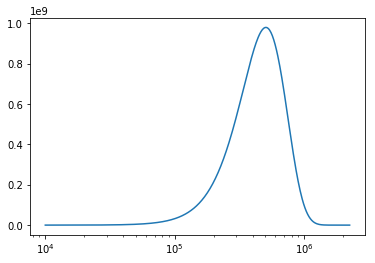

In [65]:
plt.loglog(v[:n],f[:n])
plt.show()
f=np.reshape(f[:n-1],(n-1,1))
dv=np.abs(dv)[:n-1]
v=v[:n-1]

f0=f/np.sum(f*dv) #Normalising f0

print(np.shape(dv))
plt.semilogx(v,f0)
plt.show()

eps=np.sum(0.5*m*v**2*f0*dv)*3/1.602e-19
plt.semilogx(v,(v**2*f0*dv))
plt.show()

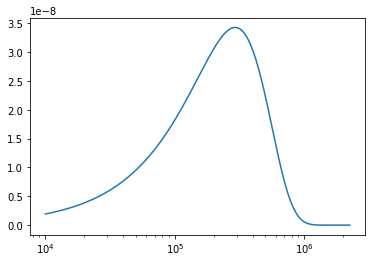

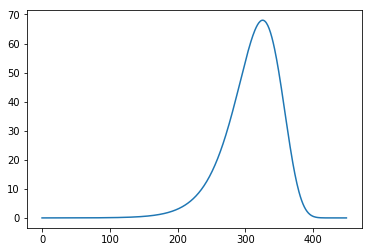

0.749424472809 0.609570554858


In [67]:
f1=-q*E*F(f,v)/(m*vm(v))/np.sum(f*dv) #Normalising f1
plt.semilogx(v,f1)
plt.show()

W=np.sum(dv*f1*v)/1e4
plt.plot(dv*f1*v)
plt.show()
print(eps,W)